<a href="https://colab.research.google.com/github/Chirag314/Obesity-Risk/blob/main/Obesity_Risk_EDA%2BBL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'playground-series-s4e2:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F68479%2F7609535%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240202%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240202T194041Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D26b773fde0f5cfeb6f069166146313f3d6255bc2369f9b4faa008fb32dba67914f472b50ce7c42113734a0bf66a99cb420e127f8feb43f568594388092b4566d6d78c25e29cfaf85b504aed1ae9d62b558c818f590c9508af1b5d91284662e49e971356fcca8ae5e6a63005c3646d84c98f1eafd4e8bb27bce8c68c939048b4b1591b7fc9119429b98338108f9363521c82443dba4ef0f19bea0dd1cad951a685b940c49af148ed537f0d717b3f3a5b79c11920b357250af7cc02647c87ac73ec9a1b4e38f1fd0f64e9d9acb3573e75e3159fb589c8c61238864985de4d275ed1f892d2472bfbf460a694d6a3bf873ace5e0f1a0570b77cb6b4b75fb0cefcfd4'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e2/sample_submission.csv
/kaggle/input/playground-series-s4e2/train.csv
/kaggle/input/playground-series-s4e2/test.csv


<div style="border-radius:10px;border:#D2222D solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">

## 🚀 Getting Started
In this binary classification task focused on predicting obesity risk in individuals, which is related to cardiovascular disease.

## 🔧 Tools and Libraries

We will be using Python for this project, along with several libraries for data analysis and machine learning. Here are the main libraries we'll be using:

- **Pandas**: For data manipulation and analysis.
- **NumPy**: For numerical computations.
- **Matplotlib and Seaborn**: For data visualization.
- **Scikit-learn**: For machine learning tasks, including data preprocessing, model training, and model evaluation.
- **Gradient Boosting (e.g., XGBoost, LightGBM)**: Ensemble method building decision trees sequentially,Often yields high predictive performance.
Handles complex relationships and feature interactions.

## 📈 Workflow

Here's a brief overview of our workflow for this project:

1. **Data Loading and Preprocessing**: Load the data and preprocess it for analysis and modeling. This includes handling missing values, encoding categorical variables, and scaling numerical variables..

2. **Exploratory Data Analysis (EDA)**: Explore the data to gain insights and understand the relationships between different **`features`** and the .

3. **Model Training**: Train the model on the preprocessed data.

4. **Model Evaluation**: Evaluate the model's performance using various metrics, such as accuracy, precision, recall, F1-score, Cohen's Kappa, and Matthews Correlation Coefficient.

5. **Error Analysis**: Analyze the instances where the model made errors to gain insights into potential improvements.

6. **Future Work**: Based on our findings, suggest potential directions for future work.

<div style="border-radius:10px;border:#D2222D solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
    
# <span style="color:#094863; font-size: 1%|;">Loading Libraries</span>

Notebook Color Schema:


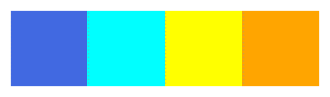

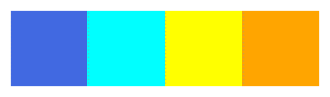

In [ ]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Utilities
import pprint
import warnings

# Data Preprocessing
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, QuantileTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import metrics, linear_model, tree, naive_bayes,neighbors, ensemble, neural_network, svm

# Feature Selection
from sklearn.feature_selection import mutual_info_classif


# Model Building
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb
import xgboost as xgb

# Cross validation
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, cross_val_predict

# Statistical Analysis
from scipy.stats import chi2_contingency

# Hyperparameter Tuning
import optuna

# Data Splitting
from sklearn.model_selection import train_test_split

# Metrices
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
def set_color_map(color_list):
    cmap_custom = ListedColormap(color_list)
    print("Notebook Color Schema:")
    sns.palplot(sns.color_palette(color_list))
    plt.show()
    return cmap_custom

color_list = ['royalblue', 'cyan','yellow', 'orange']
cmap_custom = set_color_map(color_list)

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
# ignore warnings
warnings.filterwarnings("ignore", category= UserWarning)
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [ ]:
# Define the style
rc = {
    "axes.facecolor": "#dcf5f7",
    "figure.facecolor": "#dcf5f7",
    "axes.edgecolor": "#000000",
    "grid.color": "#094863",
    "font.family": "arial",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4,
}
sns.set(rc=rc)

<div style="border-radius:10px;border:#D2222D solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">

# <span style="color:#094863; font-size: 1%|;"> Import Data and Exploration</span>

In [ ]:
# import the csv files
train = pd.read_csv('/kaggle/input/playground-series-s4e2/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')
submission=pd.read_csv('/kaggle/input/playground-series-s4e2/sample_submission.csv')

In [ ]:
train_df=train.copy()
test_df=test.copy()

In [ ]:
train_df.shape, test_df.shape

((20758, 18), (13840, 17))

In [ ]:
train_df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13840 non-null  int64  
 1   Gender                          13840 non-null  object 
 2   Age                             13840 non-null  float64
 3   Height                          13840 non-null  float64
 4   Weight                          13840 non-null  float64
 5   family_history_with_overweight  13840 non-null  object 
 6   FAVC                            13840 non-null  object 
 7   FCVC                            13840 non-null  float64
 8   NCP                             13840 non-null  float64
 9   CAEC                            13840 non-null  object 
 10  SMOKE                           13840 non-null  object 
 11  CH2O                            13840 non-null  float64
 12  SCC                             

In [ ]:
# Define the function that creates missing value heatmap
def plot_missing_data(dataset, title):
  fig,ax=plt.subplots(figsize=(5,5))
  plt.title(title)
  sns.heatmap(dataset,cbar=False)


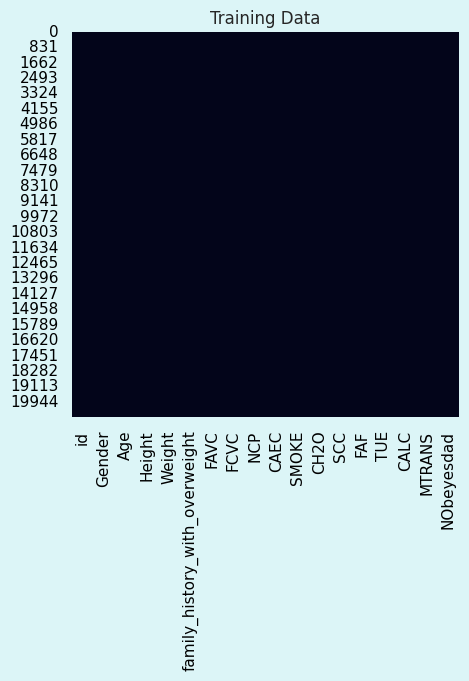

In [ ]:
plot_missing_data(train_df.isnull(),"Training Data")

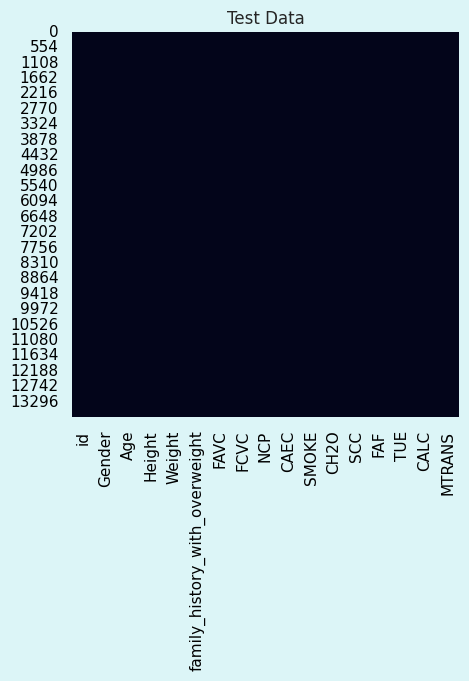

In [ ]:
plot_missing_data(test_df.isnull(),"Test Data")

#### It seems like there are no missing values in both train and test data.

In [ ]:
# Check duplicate values
train_df.duplicated().sum(), test_df.duplicated().sum()

(0, 0)

#### It seems like there are no duplicate values in both train and test data.

In [ ]:
train_df.drop(['id'],axis=1).describe().T.style.bar(subset=['mean'],color='#7BCC70')\
    .background_gradient(subset=['std'], cmap='Reds')\
    .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Age,20758.000000,23.841804,5.688072,14.000000,20.000000,22.815416,26.000000,61.000000
Height,20758.000000,1.700245,0.087312,1.450000,1.631856,1.700000,1.762887,1.975663
Weight,20758.000000,87.887768,26.379443,39.000000,66.000000,84.064875,111.600553,165.057269
FCVC,20758.000000,2.445908,0.533218,1.000000,2.000000,2.393837,3.000000,3.000000
NCP,20758.000000,2.761332,0.705375,1.000000,3.000000,3.000000,3.000000,4.000000
CH2O,20758.000000,2.029418,0.608467,1.000000,1.792022,2.000000,2.549617,3.000000
FAF,20758.000000,0.981747,0.838302,0.000000,0.008013,1.000000,1.587406,3.000000
TUE,20758.000000,0.616756,0.602113,0.000000,0.000000,0.573887,1.000000,2.000000


In [ ]:
train_df.describe(include="object").T.style.bar(subset=['unique'],color='#7BCC70')\
    .background_gradient(subset=['freq'], cmap='Reds')\


,count,unique,top,freq
Gender,20758,2,Female,10422
family_history_with_overweight,20758,2,yes,17014
FAVC,20758,2,yes,18982
CAEC,20758,4,Sometimes,17529
SMOKE,20758,2,no,20513
SCC,20758,2,no,20071
CALC,20758,3,Sometimes,15066
MTRANS,20758,5,Public_Transportation,16687
NObeyesdad,20758,7,Obesity_Type_III,4046


In [ ]:
string_columns=[f for f in train_df.columns if train_df[f].dtype == object and f != 'NObeyesdad']
numeric_columns=[f for f in train_df.columns if f not in string_columns and f not in ['id', 'NObeyesdad']]
print(string_columns)
print(numeric_columns)

['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


In [ ]:
def unique_values(data):
    total = data.count()
    unq = pd.DataFrame(total)
    unq.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
        type=data[col].dtype
    unq['Uniques'] = uniques
    return(np.transpose(unq))

In [ ]:
unique_values(train_df[string_columns])

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
Total,20758,20758,20758,20758,20758,20758,20758,20758
Uniques,2,2,2,4,2,2,3,5


In [ ]:
#Check categories for each categorical attribute
pd.set_option('display.max_colwidth',0)
cat=[]
for col in string_columns:
    catlist=train_df[col].value_counts().index.to_list()
    cat.append([col,catlist])
pd.DataFrame(cat,columns=['Column Name','Categories']).set_index('Column Name').rename_axis(None)

,Categories
Gender,"[Female, Male]"
family_history_with_overweight,"[yes, no]"
FAVC,"[yes, no]"
CAEC,"[Sometimes, Frequently, Always, no]"
SMOKE,"[no, yes]"
SCC,"[no, yes]"
CALC,"[Sometimes, no, Frequently]"
MTRANS,"[Public_Transportation, Automobile, Walking, Motorbike, Bike]"


<div style="border-radius:10px;border:#D2222D solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">

# <span style="color:#094863; font-size: 1%|;"> Exploratory Data Analysis </span>

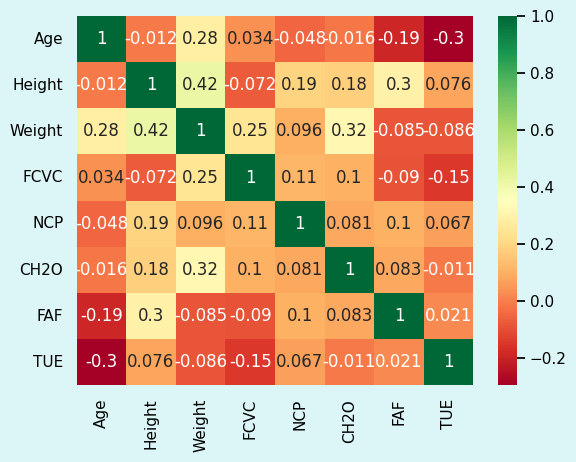

In [ ]:
# LEts check correlation matric to find out which features are important in prediction survival

corrMatrix = train_df[numeric_columns].corr()
sns.heatmap(corrMatrix, annot=True,cmap='RdYlGn')
plt.show()


<div style="border-radius:10px;border:#D2222D solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
<strong>1. Weight is strongly corelated to Age,Height,FCVC and CH2O. Using feature engineering, we can derive new features from these three or drop some and check the results.</strong><br>
<strong>2. Age is inversly co related with FAF. </strong><br>
<strong>3. All these co relation canbe further checked by plotting scatter plot of related variables.</strong>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

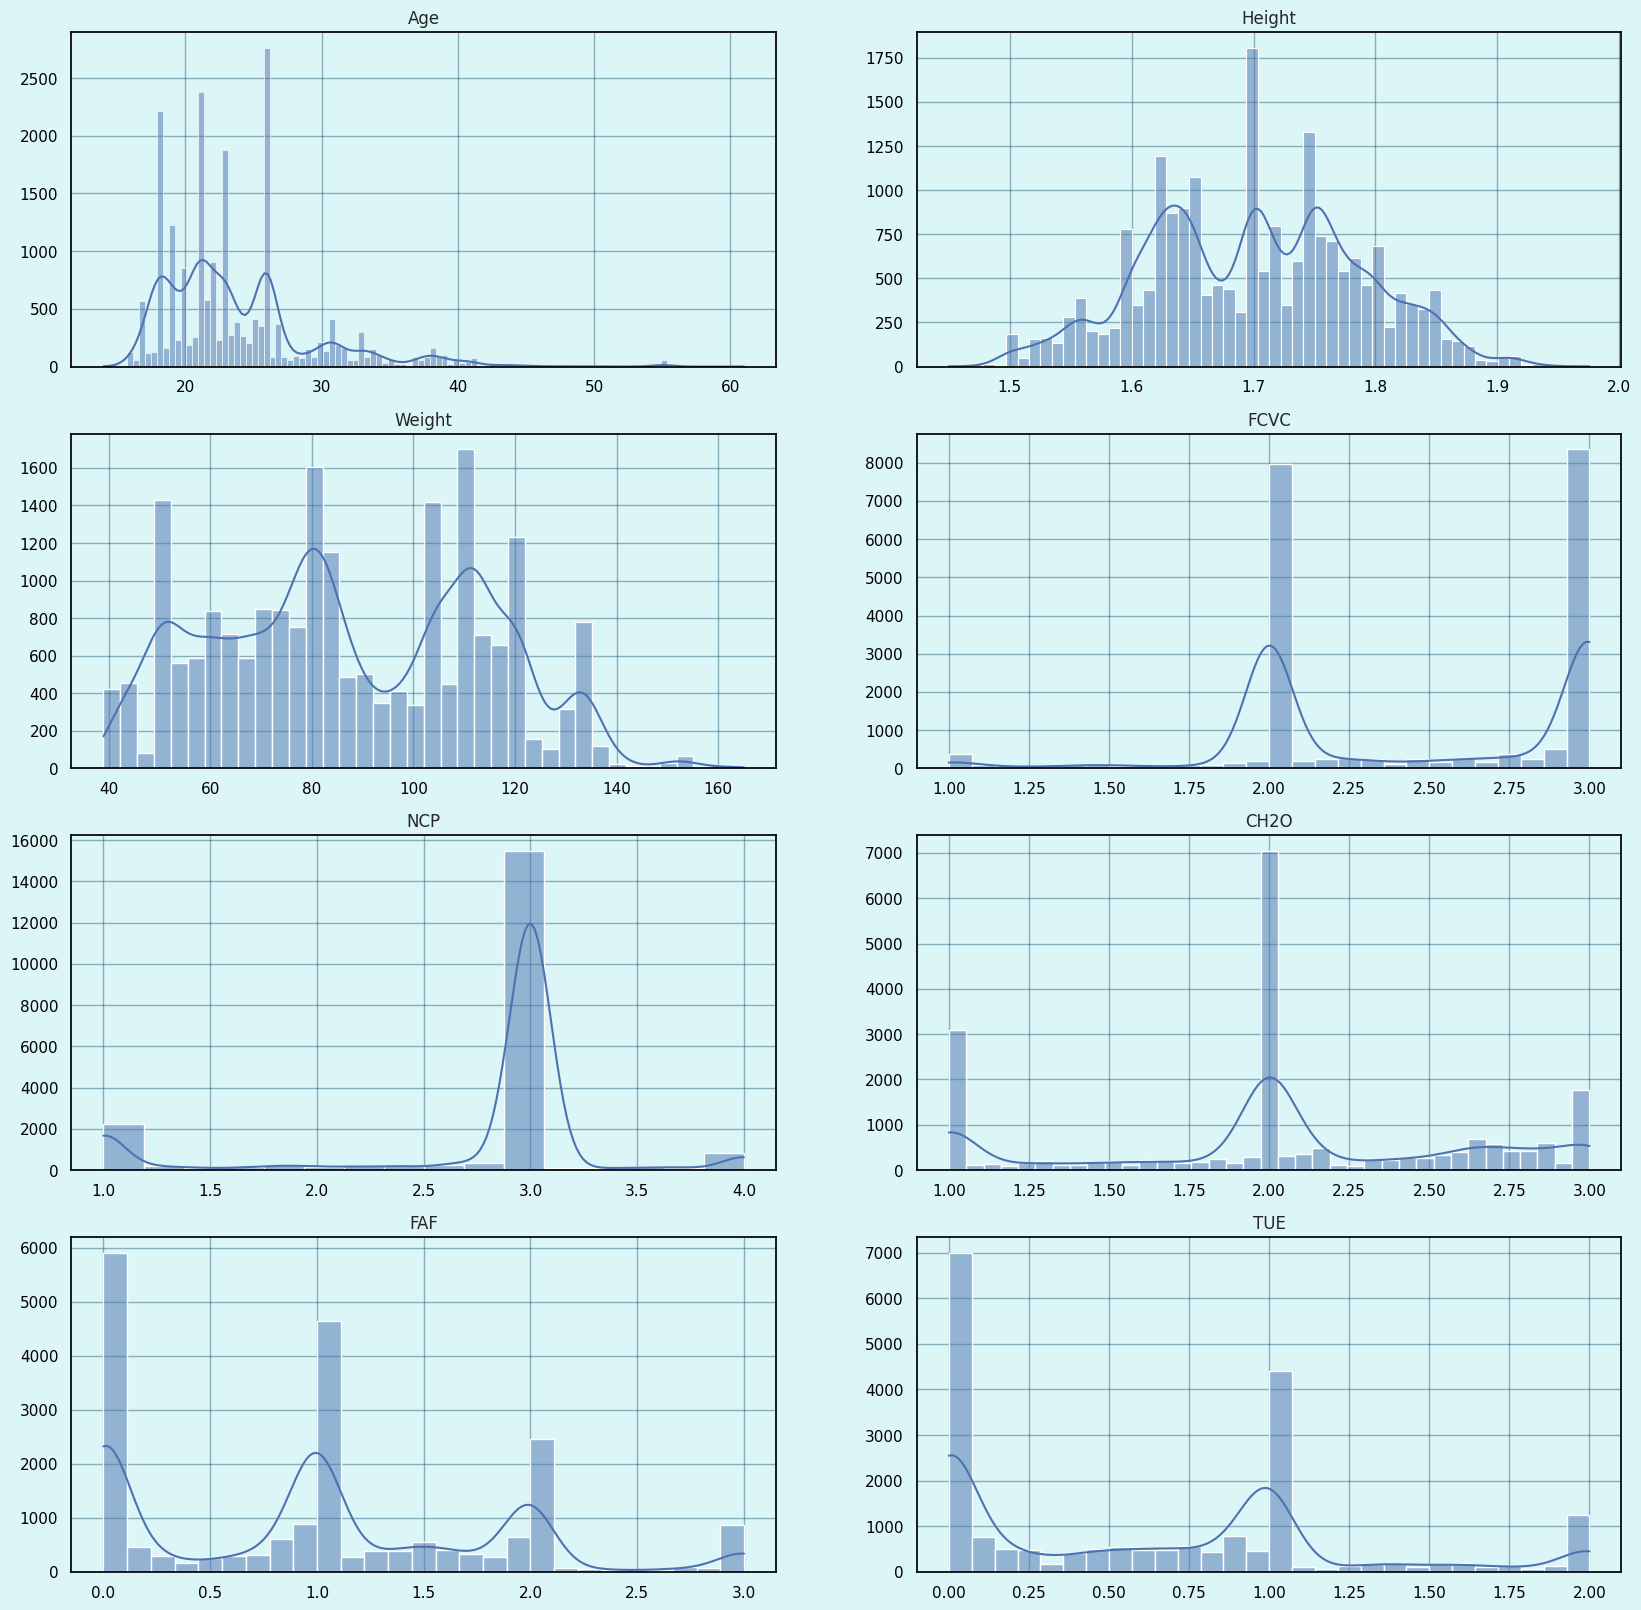

In [ ]:
# Check distribution of numeric features
import matplotlib.pyplot as plt
fig,axe=plt.subplots(nrows=4,ncols=2,figsize=(20,20),)
axe=axe.flatten()
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
axis_counter=0
for feature in numeric_columns:
  ax=axe[axis_counter]
  _=sns.histplot(data=train_df,x=feature,kde=True,ax=ax)
  _=ax.set_title("{}".format(feature))
  _=ax.set_ylabel("")
  _=ax.set_xlabel("")
  axis_counter+=1

<div style="border-radius:10px;border:#D2222D solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
<strong> 1. Age , height and weight are not normaly distributed, they need to be conveted to normal distribution.</strong><br>
<strong> 2. Other numeric features require feature engineering and further probing. Binning might be one of the options.</strong>

In [ ]:
# Check categorical features.
def plot_categorical_variables(df):
    for column in df.columns:
        if df[column].dtype == 'object' or len(df[column].unique()) < 10:
            plt.figure(figsize=(12, 6))
            sns.countplot(x=column, data=df,palette='rainbow')
            plt.title(f'Distribution of {column}')
            plt.show()

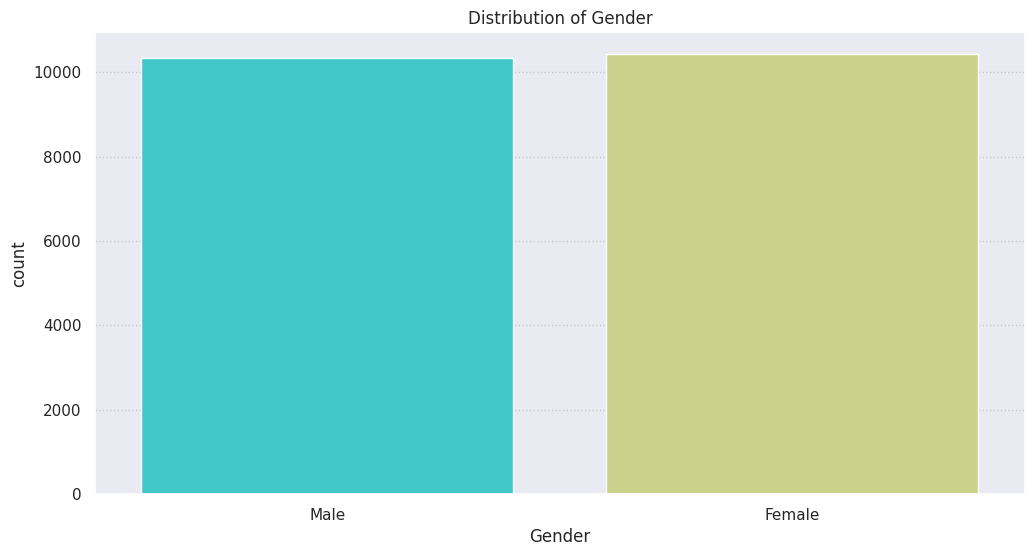

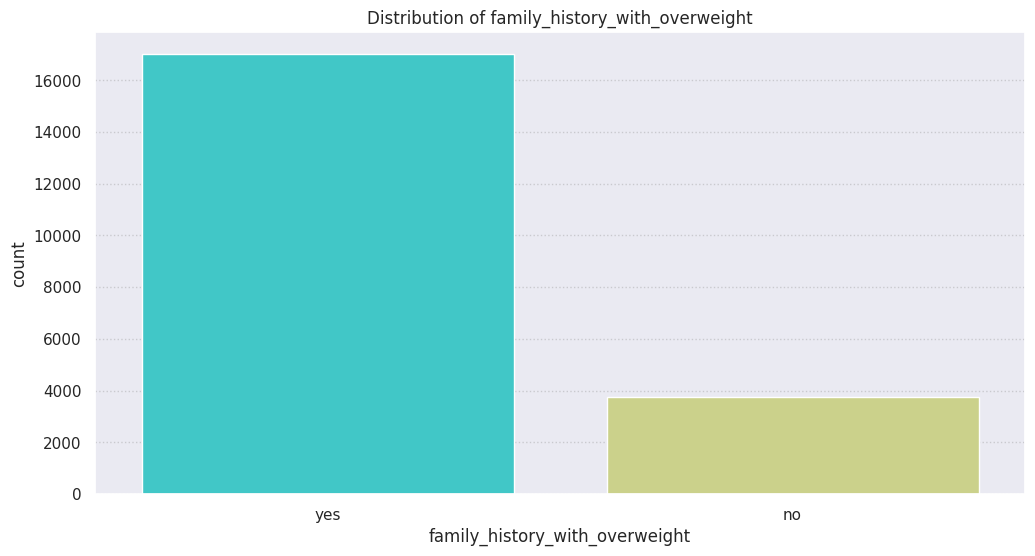

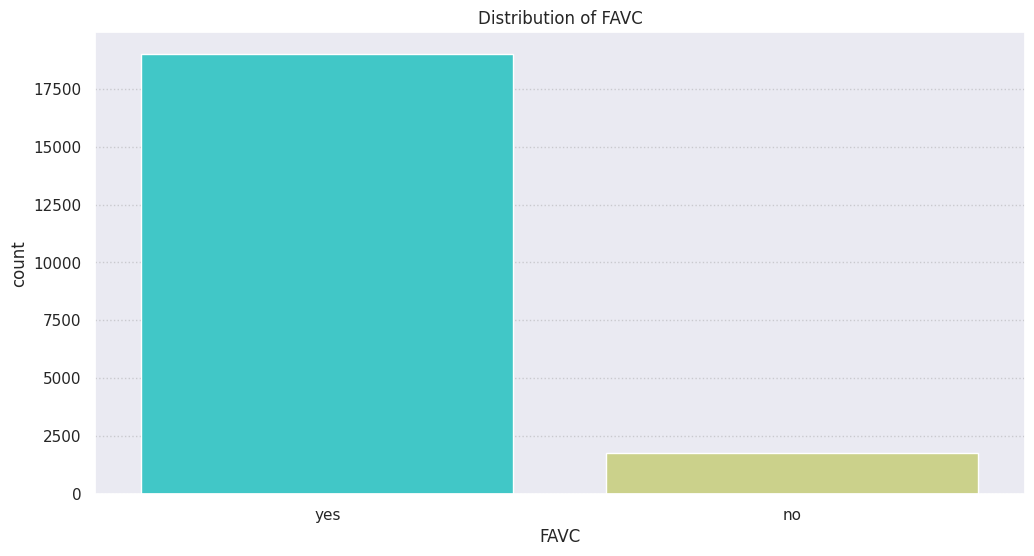

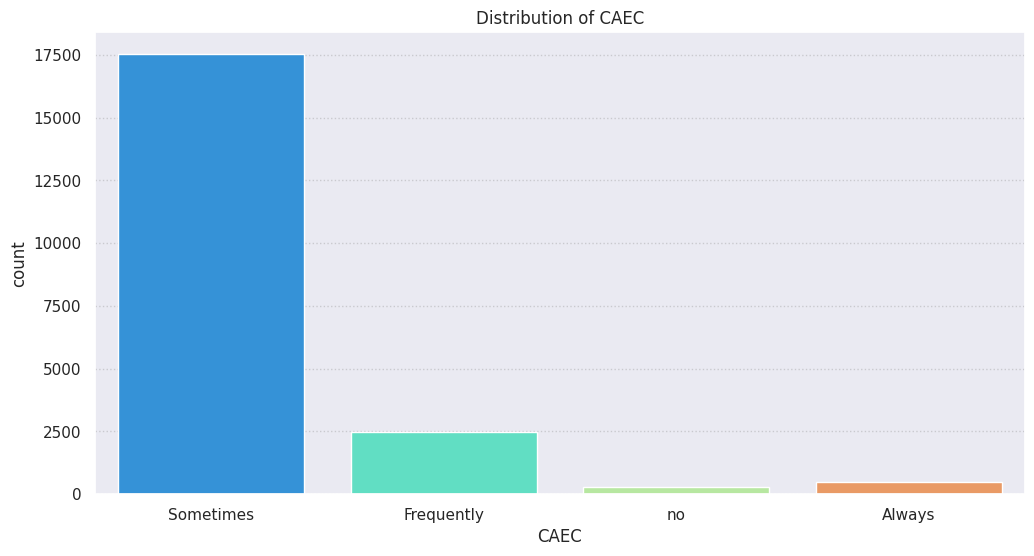

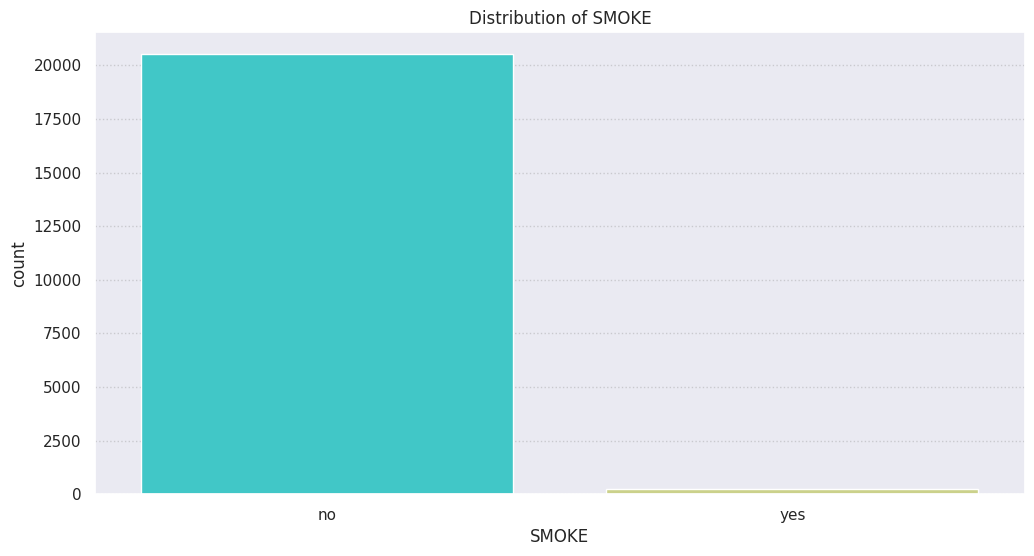

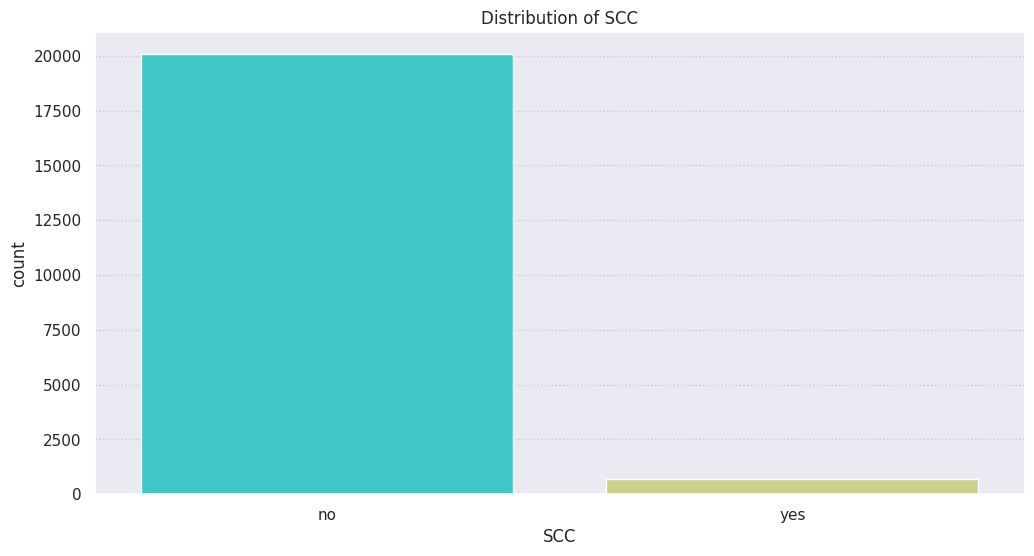

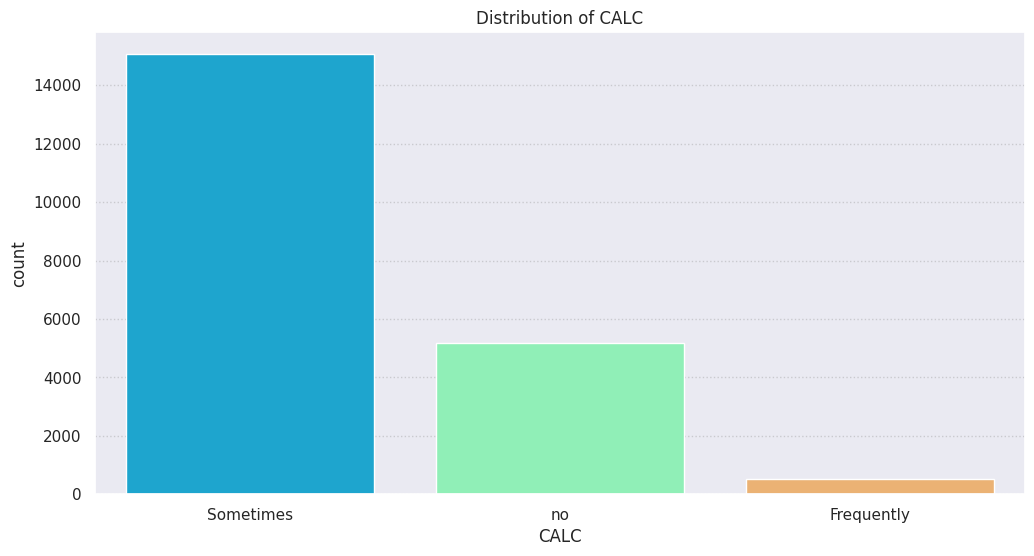

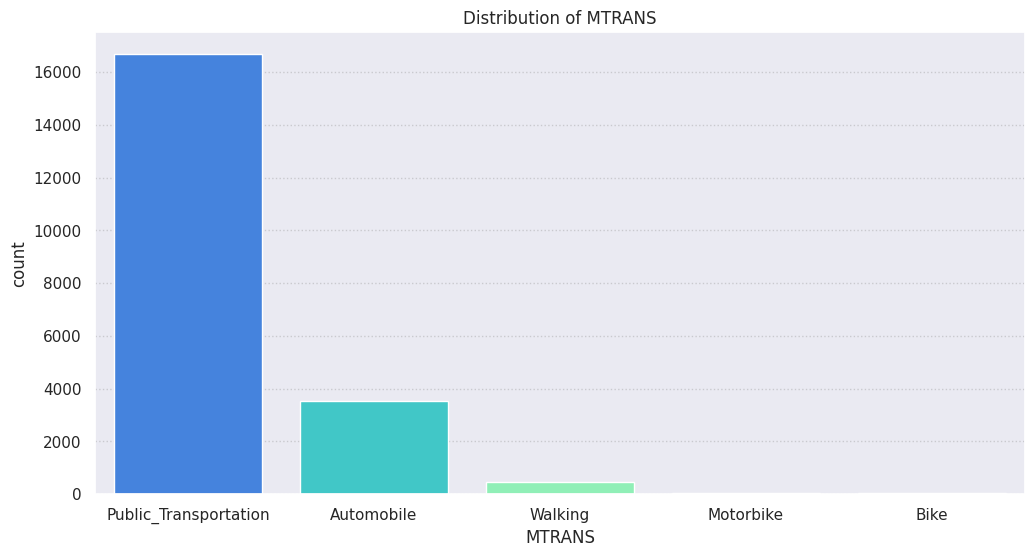

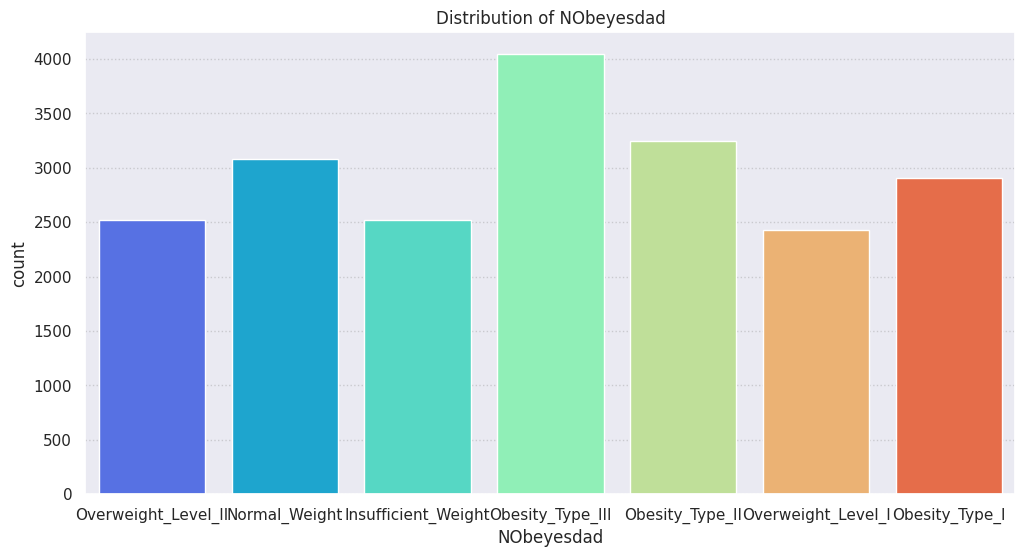

In [ ]:
plot_categorical_variables(train_df)

#### There are seven categories of obesity risk. They seem to be kind of evenly distributed so this can be considered as balanced data.

<div style="border-radius:10px;border:#D2222D solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">

# <span style="color:#094863; font-size: 1%|;"> Target Feature Distribution</span>

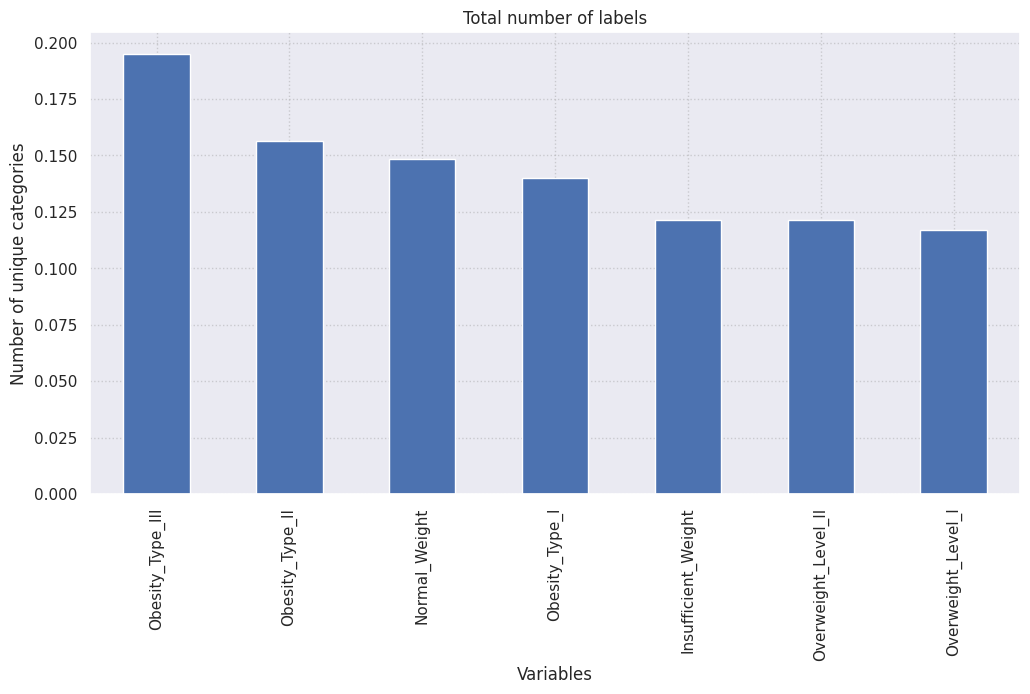

In [ ]:
train_df['NObeyesdad'].value_counts(normalize=True).plot.bar(figsize=(12,6))
plt.xlabel('Variables')
plt.ylabel('Number of unique categories')
plt.title('Total number of labels')
plt.show()


It seems there is not much difference between categories. They are sort of evenly distributed.

# <span style="color:#094863; font-size: 1%|;"> Train/Test distribution Check</span>



<div style="border-radius:10px;border:#D2222D solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
<strong>To check weather train and test data came from same distribution, we combine train and test data and added one feature to denote each.
After that we have plotted each varible with hue being train or test type. </strong>


In [ ]:
train_df['Data Type']='Train'
test_df['Data Type']='Test'

all=pd.concat([train_df.drop(['NObeyesdad'],axis=1),test_df],ignore_index=True)
all.shape


(34598, 18)

In [ ]:
all.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Data Type
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Train
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Train
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Train
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Train
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Train


In [ ]:
# Check numeric features
plt.figure(figsize=(10,4*len(numeric_columns)))
for i, f in enumerate(numeric_columns,1):
    plt.subplot(len(numeric_columns),1,i)
    sns.histplot(data=all,x=f,hue='Data Type',kde=True,element='step',stat='density',common_norm=False,palette='bright')
    plt.title(f'Distribution of {f} by Data Type')
    #plt.xlabel('')
plt.tight_layout()
plt.show()

<div style="border-radius:10px;border:#D2222D solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">

## <span style="color:#094863; font-size: 1%|;"> Train/Test categorical features check</span>


In [ ]:
#Plot categorical features
plt.figure(figsize=(10,4*len(string_columns)))
for i , f in enumerate(string_columns,1):
    plt.subplot(len(string_columns),1,i)
    sns.countplot(data=all,x=f,hue='Data Type',palette = 'pastel')
    plt.title(f'Distribution of {f} by Data Type')
plt.tight_layout()
plt.show()

<div style="border-radius:10px;border:#D2222D solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">

<strong> It seems from above graphs that train and test features follow same distribution, so they are from same data.

## <span style="color:#094863; font-size: 1%|;"> Prepare Data For Modelling</span>

In [ ]:
category_mapping={
    'Obesity_Type_III':0,
    'Obesity_Type_II':1,
    'Normal_Weight':2,
    'Obesity_Type_I':3,
    'Insufficient_Weight':4,
    'Overweight_Level_II':5,
    'Overweight_Level_I':6,
}
train_df['y']=train_df['NObeyesdad'].map(category_mapping)
train_df['y'].head()
train_df.drop(['Data Type'],axis=1)

In [ ]:
#split data into train and val set
X_train,X_test,y_train,y_test=train_test_split(train_df.drop(['id','NObeyesdad','y','Data Type'],axis=1),train_df['y'],test_size=0.2,random_state=42)
X_train.shape, y_train.shape, X_test.shape,y_test.shape

In [ ]:
from sklearn.preprocessing import LabelEncoder
for colname in X_train.select_dtypes(['object','bool']).columns:
  X_train[colname]=LabelEncoder().fit_transform(X_train[colname])

for colname in X_test.select_dtypes(['object','bool']).columns:
  X_test[colname]=LabelEncoder().fit_transform(X_test[colname])

In [ ]:
#Use standard scaler for numeric data transformation
from sklearn.preprocessing import MinMaxScaler
sc=StandardScaler()
sc.fit(X_train[numeric_columns])


X_train[numeric_columns]=sc.transform(X_train[numeric_columns])
X_test[numeric_columns]=sc.transform(X_test[numeric_columns])

X_train.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
9958,1,-1.199372,0.800816,0.343527,1,1,1.044165,0.338791,0,0,-0.047425,0,2.394982,0.629728,2,0
7841,1,-0.213196,0.610243,-1.256602,1,1,-0.832617,1.759582,2,0,-0.047425,0,1.205953,0.629728,2,3
9293,1,-0.357492,1.372928,1.294154,1,1,1.044165,0.169457,2,0,-0.631484,0,-0.292365,-1.025610,1,3
15209,0,2.976687,-1.379006,-0.302254,1,1,-0.832617,0.338791,2,0,-1.694229,0,-1.172105,-1.025610,1,0
16515,1,-0.155357,1.144999,0.267553,1,0,1.044165,0.338791,2,0,1.599379,0,1.205953,0.629728,0,3


In [ ]:
X_train[numeric_columns].describe().T.style.bar(subset=['mean'],color='#7BCC70')\
    .background_gradient(subset=['std'], cmap='Reds')\
    .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Age,16606.000000,-0.000000,1.000030,-1.721379,-0.677365,-0.184571,0.366650,6.456736
Height,16606.000000,0.000000,1.000030,-2.870463,-0.784075,-0.002276,0.714323,3.160336
Weight,16606.000000,-0.000000,1.000030,-1.859728,-0.818826,-0.142677,0.898161,2.928830
FCVC,16606.000000,0.000000,1.000030,-2.709399,-0.832617,-0.139815,1.044165,1.044165
NCP,16606.000000,-0.000000,1.000030,-2.502790,0.338791,0.338791,0.338791,1.759582
CH2O,16606.000000,-0.000000,1.000030,-1.694229,-0.382950,-0.047425,0.830755,1.599379
FAF,16606.000000,0.000000,1.000030,-1.172105,-1.161616,0.016924,0.730978,2.394982
TUE,16606.000000,0.000000,1.000030,-1.025610,-1.025610,-0.075515,0.629728,2.285067


<div style="border-radius:10px;border:#D2222D solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">

# <span style="color:#094863; font-size: 1%|;"> Define Baseline Models</span>

In [ ]:
rand=42
import lightgbm as lgb
import xgboost as xgb
import catboost as catboost
class_models = {
    #Tree
    'decision_tree':{
        'model': tree. DecisionTreeClassifier(max_depth=7,
                                              random_state=rand)
    },

    #Nearest Neighbors
    'knn':{'model': neighbors.KNeighborsClassifier(n_neighbors=7)},

    #Ensemble Methods
    'gradient_boosting':{
        'model':ensemble.
        GradientBoostingClassifier(n_estimators=210)
    },

    'random_forest':{
        'model':ensemble.RandomForestClassifier(
            max_depth=11,class_weight='balanced', random_state=rand
        )
    },

    'XGBoost':{
        'model': xgb.XGBClassifier(
            max_depth=7,class_weight='balanced',eval_metric = 'mlogloss', random_state=rand
        )
    },

    'LightGBM':{
        'model':lgb.LGBMClassifier(
            num_leaves=35,max_depth=7,class_weight='balanced', random_state=rand
        )
    },

    'CatBoost':{
        'model': catboost.CatBoostClassifier(
                iterations=100, depth=6, learning_rate=0.1,
                   loss_function='MultiClass', verbose=False
        )
    }

}

<div style="border-radius:10px;border:#D2222D solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">

## <span style="color:#094863; font-size: 1%|;"> Training And Inference</span>

In [ ]:
from sklearn.preprocessing import label_binarize
for model_name, model_info in class_models.items():
    fitted_model = model_info['model'].fit(X_train, y_train)
    y_train_pred = fitted_model.predict(X_train)
    y_test_pred = fitted_model.predict(X_test)

    model_info['fitted'] = fitted_model
    model_info['preds'] = y_test_pred
    model_info['Accuracy_train'] = metrics.accuracy_score(y_train, y_train_pred)
    model_info['Accuracy_test'] = metrics.accuracy_score(y_test, y_test_pred)
    model_info['Recall_train'] = metrics.recall_score(y_train, y_train_pred, average='macro')
    model_info['Recall_test'] = metrics.recall_score(y_test, y_test_pred, average='macro')

    # For models supporting predict_proba, calculate additional metrics
    if hasattr(fitted_model, "predict_proba"):
        y_test_prob = fitted_model.predict_proba(X_test)
        # ROC AUC calculation for multi-class requires binarized labels
        y_test_binarized = label_binarize(y_test, classes=np.unique(y_train))
        if y_test_binarized.shape[1] == 1:  # Binarize returns a single column for two classes
            y_test_binarized = np.hstack((1 - y_test_binarized, y_test_binarized))
        model_info['ROC_AUC_test'] = metrics.roc_auc_score(y_test_binarized, y_test_prob, multi_class='ovr', average='macro')
    else:
        model_info['ROC_AUC_test'] = np.nan

    model_info['F1_test'] = metrics.f1_score(y_test, y_test_pred, average='macro')
    model_info['MCC_test'] = metrics.matthews_corrcoef(y_test, y_test_pred)

# Create a DataFrame to display metrics
class_metrics = pd.DataFrame.from_dict(
    class_models, orient='index',
    columns=['Accuracy_train', 'Accuracy_test', 'Recall_train', 'Recall_test', 'ROC_AUC_test', 'F1_test', 'MCC_test']
)

# Display the metrics, sorted by ROC_AUC_test score
display = class_metrics.sort_values(by='ROC_AUC_test', ascending=False).style.format("{:.3f}").background_gradient(cmap='plasma', low=1, high=0.1, subset=['Accuracy_train', 'Accuracy_test']).background_gradient(cmap='viridis', low=1, high=0.1, subset=['Recall_train', 'Recall_test', 'ROC_AUC_test', 'F1_test', 'MCC_test'])
display


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002769 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2019
[LightGBM] [Info] Number of data points in the train set: 16606, number of used features: 16
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

,Accuracy_train,Accuracy_test,Recall_train,Recall_test,ROC_AUC_test,F1_test,MCC_test
CatBoost,0.907,0.351,0.897,0.285,0.710,0.148,0.268
random_forest,0.945,0.351,0.939,0.285,0.669,0.149,0.268
XGBoost,0.995,0.327,0.995,0.272,0.643,0.178,0.214
LightGBM,0.977,0.229,0.975,0.207,0.604,0.133,0.112
gradient_boosting,0.940,0.206,0.933,0.194,0.599,0.146,0.074
knn,0.823,0.197,0.802,0.147,0.516,0.055,0.025
decision_tree,0.882,0.224,0.869,0.210,0.508,0.130,0.110


<strong> From above,it seems that XGBoost is the most succesfull . So we will use it to predict final test data.</strong>

<div style="border-radius:10px;border:#D2222D solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">

## <span style="color:#094863; font-size: 1%|;"> Prediction and Submission</span>

In [ ]:
for colname in test_df.select_dtypes(['object','bool']).columns:
  test_df[colname]=LabelEncoder().fit_transform(test_df[colname])

test_df[numeric_columns]=sc.transform(test_df[numeric_columns])

test_df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Data Type
0,20758,1,26.899886,1.848294,120.644178,1,1,2.938616,3.000000,2,0,2.825629,0,8.554000e-01,-1.444106e-16,2,3,0
1,20759,0,21.000000,1.600000,66.000000,1,1,2.000000,1.000000,2,0,3.000000,0,1.000000e+00,-1.444106e-16,2,3,0
2,20760,0,26.000000,1.643355,111.600553,1,1,3.000000,3.000000,2,0,2.621877,0,-2.888211e-18,2.505020e-01,2,3,0
3,20761,1,20.979254,1.553127,103.669116,1,1,2.000000,2.977909,2,0,2.786417,0,9.485100e-02,-1.444106e-16,2,3,0
4,20762,0,26.000000,1.627396,104.835346,1,1,3.000000,3.000000,2,0,2.653531,0,-2.888211e-18,7.410690e-01,2,3,0


In [ ]:
submission['y_test_pred'] = class_models['XGBoost']['model'].predict(test_df.drop(['id','Data Type'],axis=1))

In [ ]:
submission.head()

,id,NObeyesdad,y_test_pred
0,20758,Normal_Weight,1
1,20759,Normal_Weight,0
2,20760,Normal_Weight,0
3,20761,Normal_Weight,1
4,20762,Normal_Weight,0


In [ ]:
# Re map the categories
numeric_to_category={v:k for k,v in category_mapping.items()}
submission['NObeyesdad']=submission['y_test_pred'].map(numeric_to_category)
submission.drop(['y_test_pred'],axis=1).head()

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Obesity_Type_III
2,20760,Obesity_Type_III
3,20761,Obesity_Type_II
4,20762,Obesity_Type_III


In [ ]:
submission.drop(['y_test_pred'],axis=1).to_csv('submission.csv',index=False)

<div style="border-radius:10px;border:#D2222D solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">

## <span style="color:#094863; font-size: 1%|;"> Thank You</span>